In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import random
import plotly.io as io
import plotly.graph_objects as go
import pycountry_convert

# Setting up some stuff

Reading the list of colours

In [97]:
with open('Colours_list_real.txt', 'r') as file:
    colour_list = file.readlines()
    colour_list = [value.strip() for value in colour_list]
colour_list

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgrey',
 'darkgreen',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'grey',
 'green',
 'greenyellow',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

Removing some colours which don't go well with a white background

In [98]:
exceptions = [
    'cornsilk', 'floralwhite', 'ghostwhite', 'honeydew', 
    'lavenderblush', 'lemonchiffon', 'lightgoldenrod-yellow',
    'lightyellow', 'linen', 'mintcream', 'oldlace', 'seashell', 
    'snow', 'white', 'whitesmoke', 'gainsboro', 'bisque'
]

colour_list = [colour for colour in colour_list if colour not in exceptions]

Configuring the order of day of week and month name

In [99]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Configuring the maxmimum number of columns to display.

In [100]:
pd.set_option('display.max_columns', 50)

Experimental plotly

In [101]:
template = go.layout.Template()
template.layout.font.color = 'white'
template.layout.paper_bgcolor = '#1E1E1E'
template.layout.plot_bgcolor = 'azure'
px.defaults.template = template

Define a function which returns a random background colour and a random colour.

In [102]:
def generate_random_colour() -> str:
    """
    This function returns one CSS colour value: the discrete colour sequence.
    """
    return random.choice(colour_list)

In [103]:
df = pd.read_parquet('Processed_dataset/Crash_data.parquet')
df.head(5)

,Date,Time,Operator,Flight_No,AC_Type,Registration,cn_ln,Ground,Decade,City,Country,US_State,Total_abroad,Passengers_abroad,Crew_abroad,Total_fatalities,Passengers_fatalities,Crew_fatalities,Source,Destination,Total_survivors,Passengers_survivors,Crew_survivors
0,2023-01-15,10:50:00,Yeti Airlines,YT691,ATR 72-500-72-212-A,9NANC,754,0,2020,Pokhara,Nepal,None,72,68,4,72,68,4,Kathmandu,Pokhara,0,0,0
1,2022-11-21,10:15:00,AeroPaca SAS,?,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,0,2020,Medellín,Colombia,None,8,6,2,8,6,2,Medellín,Pizarro,0,0,0
2,2022-11-18,15:11:00,LATAM,LA2213,Airbus 320-271N,CC-BHB,7864,2,2020,Lima,Peru,None,108,102,6,0,0,0,Lima,Juliaca,108,102,6
3,2022-11-06,08:53:00,Precision Air,PW494,ATR 42-500,5H-PWF,819,0,2020,Bukoba,Tanzania,None,43,39,39,19,17,2,Dar es-Salaam,Bukoba,24,22,37
4,2022-07-16,22:47:00,Meridian,MEM3032,Antonov An-12,UR-CIC,01347701,0,2020,Eleftheroupolis,Greece,None,8,0,8,8,0,8,Nis,Amman,0,0,0


# 1. Feature engineering

## 1.1. Make a column for survival percentage

In [104]:
df['Survival_rate'] = (df['Total_survivors'] / df['Total_abroad']) * 100
df.head()

,Date,Time,Operator,Flight_No,AC_Type,Registration,cn_ln,Ground,Decade,City,Country,US_State,Total_abroad,Passengers_abroad,Crew_abroad,Total_fatalities,Passengers_fatalities,Crew_fatalities,Source,Destination,Total_survivors,Passengers_survivors,Crew_survivors,Survival_rate
0,2023-01-15,10:50:00,Yeti Airlines,YT691,ATR 72-500-72-212-A,9NANC,754,0,2020,Pokhara,Nepal,None,72,68,4,72,68,4,Kathmandu,Pokhara,0,0,0,0.0
1,2022-11-21,10:15:00,AeroPaca SAS,?,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,0,2020,Medellín,Colombia,None,8,6,2,8,6,2,Medellín,Pizarro,0,0,0,0.0
2,2022-11-18,15:11:00,LATAM,LA2213,Airbus 320-271N,CC-BHB,7864,2,2020,Lima,Peru,None,108,102,6,0,0,0,Lima,Juliaca,108,102,6,100.0
3,2022-11-06,08:53:00,Precision Air,PW494,ATR 42-500,5H-PWF,819,0,2020,Bukoba,Tanzania,None,43,39,39,19,17,2,Dar es-Salaam,Bukoba,24,22,37,55.813953
4,2022-07-16,22:47:00,Meridian,MEM3032,Antonov An-12,UR-CIC,01347701,0,2020,Eleftheroupolis,Greece,None,8,0,8,8,0,8,Nis,Amman,0,0,0,0.0


## 1.2 Making a type column for making passenger or military aircraft

In [105]:
def determine_type(value):
    if 'military' in value.lower():
        return 'Military'
    else:
        return 'Passenger'
    
df['Type'] = df['Operator'].apply(lambda x: determine_type(x))
df.head()

,Date,Time,Operator,Flight_No,AC_Type,Registration,cn_ln,Ground,Decade,City,Country,US_State,Total_abroad,Passengers_abroad,Crew_abroad,Total_fatalities,Passengers_fatalities,Crew_fatalities,Source,Destination,Total_survivors,Passengers_survivors,Crew_survivors,Survival_rate,Type
0,2023-01-15,10:50:00,Yeti Airlines,YT691,ATR 72-500-72-212-A,9NANC,754,0,2020,Pokhara,Nepal,None,72,68,4,72,68,4,Kathmandu,Pokhara,0,0,0,0.0,Passenger
1,2022-11-21,10:15:00,AeroPaca SAS,?,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,0,2020,Medellín,Colombia,None,8,6,2,8,6,2,Medellín,Pizarro,0,0,0,0.0,Passenger
2,2022-11-18,15:11:00,LATAM,LA2213,Airbus 320-271N,CC-BHB,7864,2,2020,Lima,Peru,None,108,102,6,0,0,0,Lima,Juliaca,108,102,6,100.0,Passenger
3,2022-11-06,08:53:00,Precision Air,PW494,ATR 42-500,5H-PWF,819,0,2020,Bukoba,Tanzania,None,43,39,39,19,17,2,Dar es-Salaam,Bukoba,24,22,37,55.813953,Passenger
4,2022-07-16,22:47:00,Meridian,MEM3032,Antonov An-12,UR-CIC,01347701,0,2020,Eleftheroupolis,Greece,None,8,0,8,8,0,8,Nis,Amman,0,0,0,0.0,Passenger


## 1.3 Making columns for day of the week and month name

In [106]:
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].apply(lambda x: pd.datetime.strptime(str(x), '%m').strftime('%B'))
df['Day_of_week'] = df['Date'].dt.strftime('%A')
df.iloc[:5, -2:]

C:\Users\user\AppData\Local\Temp\ipykernel_5776\29041736.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Month,Day_of_week
0,January,Sunday
1,November,Monday
2,November,Friday
3,November,Sunday
4,July,Saturday


Checking out the memory consumed before data type conversion

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4596 non-null   datetime64[ns]
 1   Time                   3223 non-null   object        
 2   Operator               4596 non-null   object        
 3   Flight_No              4596 non-null   object        
 4   AC_Type                4596 non-null   object        
 5   Registration           4596 non-null   object        
 6   cn_ln                  4596 non-null   object        
 7   Ground                 4556 non-null   Int16         
 8   Decade                 4596 non-null   int64         
 9   City                   4596 non-null   object        
 10  Country                4596 non-null   object        
 11  US_State               964 non-null    object        
 12  Total_abroad           4582 non-null   Int16         
 13  Pas

Now make that into a category type for ordering purposes, along with the US State names

In [108]:
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=day_order, ordered=True)
df['US_State'] = pd.Categorical(df['US_State'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4596 non-null   datetime64[ns]
 1   Time                   3223 non-null   object        
 2   Operator               4596 non-null   object        
 3   Flight_No              4596 non-null   object        
 4   AC_Type                4596 non-null   object        
 5   Registration           4596 non-null   object        
 6   cn_ln                  4596 non-null   object        
 7   Ground                 4556 non-null   Int16         
 8   Decade                 4596 non-null   int64         
 9   City                   4596 non-null   object        
 10  Country                4596 non-null   object        
 11  US_State               964 non-null    category      
 12  Total_abroad           4582 non-null   Int16         
 13  Pas

## 1.4 Continent column

In [110]:
continent_dict = {'NA': 'North America', 'SA': 'South America', 'EU': 'Europe', 'AF': 'Africa', 'AS': 'Asia', 'OC': 'Oceania'}

In [111]:
def get_continent_code(x):
    try:
        country_code = pycountry_convert.country_name_to_country_alpha2(x)
        continent_code = pycountry_convert.country_alpha2_to_continent_code(country_code)
        return continent_code
    except:
        return None

df['Continent Code'] = df['Country'].apply(lambda x: get_continent_code(x))
df['Continent'] = df['Continent Code'].map(continent_dict)
df = df.drop('Continent Code', axis=1)

# 2. Visualisation

## 2.1 Number of accidents per year

In [112]:
df_year = df.groupby(df['Date'].dt.year) \
            .size() \
            .reset_index(name='Crash_count') \
            .rename(columns={'Date': 'Year'})
            
selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')

fig = px.line(
    data_frame=df_year,
    x='Year',
    y='Crash_count',
    markers=True,
    title=f'Accidents per year',
    color_discrete_sequence=[selected_colour]
)
fig.show()

Colour = royalblue


In [113]:
df.columns

Index(['Date', 'Time', 'Operator', 'Flight_No', 'AC_Type', 'Registration',
       'cn_ln', 'Ground', 'Decade', 'City', 'Country', 'US_State',
       'Total_abroad', 'Passengers_abroad', 'Crew_abroad', 'Total_fatalities',
       'Passengers_fatalities', 'Crew_fatalities', 'Source', 'Destination',
       'Total_survivors', 'Passengers_survivors', 'Crew_survivors',
       'Survival_rate', 'Type', 'Month', 'Day_of_week', 'Continent'],
      dtype='object')

## 2.2 Number of fatalities per year

In [114]:
df_deaths = df.groupby(df['Date'].dt.year) \
                .sum() \
                ['Total_fatalities'] \
                .reset_index() \
                .rename(columns={'Date': 'Year'})
                
selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')

fig = px.line(
    data_frame=df_deaths,
    x='Year',
    y='Total_fatalities',
    markers=True,
    title='Total fatalities by year',
    color_discrete_sequence=[selected_colour]
)
fig.show()

Colour = plum


## 2.3 Showing the number of accidents per time

In [115]:
import plotly.express as px

df_time = df.groupby(['Time']) \
            .size() \
            .reset_index(name='Crash_count') \
            .sort_values(by='Crash_count', ascending=False)

df_time['Time'] = pd.to_datetime(df_time['Time'], format="%H:%M:%S").sort_values()

selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')

px.histogram(    
    data_frame=df_time,
    x='Time',
    y='Crash_count',
    text_auto=True,
    nbins=24*2,
    title='Number of crashes per quarter',
    color_discrete_sequence=[selected_colour]
).update_layout(bargap=0.05)

Colour = tan


## 2.4 Seeing which countries had the highest number of crashes

And then make a line plot having at least ten fatalities

In [116]:
df_country = df.query("Total_fatalities >= 10") \
                .groupby('Country') \
                .size() \
                .reset_index(name='Crash_count') \
                .sort_values(by='Crash_count', ascending=True) \
                .tail(10)
                
selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')                

fig = px.histogram(
    df_country, 
    y='Country', 
    orientation='h', 
    x='Crash_count',
    text_auto=True,
    title='Countires with most crashes (>= 10 fatalities)',
    barmode='overlay',
    opacity=0.9,
    color_discrete_sequence=[selected_colour]
)
fig.update_layout(bargap=0.1)

Colour = aqua


Finding the most fatal accidents

In [117]:
df.sort_values(by='Total_fatalities', ascending=False).head(1)

,Date,Time,Operator,Flight_No,AC_Type,Registration,cn_ln,Ground,Decade,City,Country,US_State,Total_abroad,Passengers_abroad,Crew_abroad,Total_fatalities,Passengers_fatalities,Crew_fatalities,Source,Destination,Total_survivors,Passengers_survivors,Crew_survivors,Survival_rate,Type,Month,Day_of_week,Continent
1953,1977-03-27,17:07:00,Pan American World Airways / KLM,1736/4805,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,0,1970,Tenerife,Canary Islands,NaN,644,614,30,583,560,23,Tenerife - Las Palmas / Tenerife,Las Palmas,61,54,7,9.47205,Passenger,March,Sunday,NaN


Most fatal accidnets on the ground

In [118]:
df.sort_values(by='Ground', ascending=False).head(1)

,Date,Time,Operator,Flight_No,AC_Type,Registration,cn_ln,Ground,Decade,City,Country,US_State,Total_abroad,Passengers_abroad,Crew_abroad,Total_fatalities,Passengers_fatalities,Crew_fatalities,Source,Destination,Total_survivors,Passengers_survivors,Crew_survivors,Survival_rate,Type,Month,Day_of_week,Continent
947,1996-01-08,12:43:00,African Air,?,Antonov AN-32B,RA-26222,2301,225,1990,Kinshasa,Zaire,NaN,6,0,6,2,0,2,Kinshasa,Kahemba,4,0,4,66.666667,Passenger,January,Monday,NaN


## 2.5 Deadliest decade

In [119]:
df.groupby('Decade') \
    .size() \
    .reset_index(drop=False, name='Crash_count')

,Decade,Crash_count
0,1900,2
1,1910,31
2,1920,168
3,1930,340
4,1940,515
5,1950,600
6,1960,583
7,1970,550
8,1980,504
9,1990,581


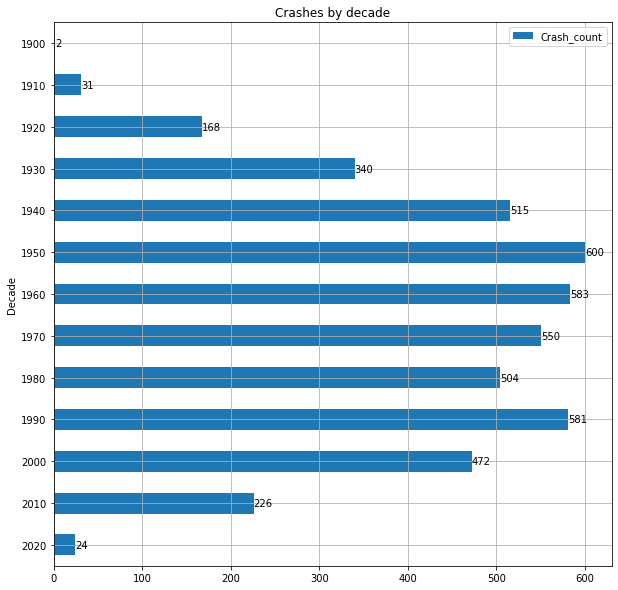

In [120]:
ax = df.groupby('Decade') \
    .size() \
    .reset_index(name='Crash_count') \
    .sort_values(by='Decade', ascending=False) \
    .plot(kind='barh', figsize=(10, 10), y='Crash_count', x='Decade', title='Crashes by decade')
    
for i in ax.containers:
    ax.bar_label(i, )
plt.grid()
plt.show()

## 2.6 Number of fatalities for military and passenger airlines

In [121]:
df_year_deaths = df.groupby([df['Date'].dt.year, 'Type']) \
                    .sum() \
                    ['Total_fatalities'] \
                    .reset_index() \
                    .rename(columns={'Date': 'Year'})
                    
selected_colour_1, selected_colour_2 = generate_random_colour(), generate_random_colour()

print(f'First colour = {selected_colour_1} and second colour = {selected_colour_2}')    
                
px.line(
    data_frame=df_year_deaths,
    x='Year',
    y='Total_fatalities',
    color='Type',
    markers=True,
    title='Number of fatalities for military and civilian flights',
    color_discrete_sequence=[selected_colour_1, selected_colour_2]
)

First colour = midnightblue and second colour = darkslateblue


## 2.7 Number of crashes for military and passenger airlines

In [122]:
df_year_crashes = df.groupby([df['Date'].dt.year, 'Type']) \
                    .size() \
                    .reset_index(name='Crashes') \
                    .rename(columns={'Date': 'Year'})
                    
selected_colour_1, selected_colour_2 = generate_random_colour(), generate_random_colour()

print(f'First colour = {selected_colour_1} and second colour = {selected_colour_2}')   

px.line(
    df_year_crashes,
    x='Year',
    y='Crashes',
    color='Type',
    title='Number of crashes for military and civilian flights',
    markers=True,
    color_discrete_sequence=[selected_colour_1, selected_colour_2],
    line_shape='spline'
)

First colour = olive and second colour = green


## 2.8 Survival rates per year

In [123]:
df_SR = df.groupby([df['Date'].dt.year]) \
            .mean() \
            ['Survival_rate'] \
            .reset_index() \
            .rename(columns={'Date': 'Year'})
            
selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')  
            
px.line(
    df_SR,
    x='Year', y='Survival_rate',
    title='Survival rate by year',
    markers=True,
    line_shape='spline',
    color_discrete_sequence=[selected_colour]
)

Colour = lightcoral


## 2.9 Fatalities in the USA

In [124]:
df_fatalities_USA = df.query('Country == "United States of America" and Type == "Passenger"') \
                        .groupby([df['Date'].dt.year]) \
                        .sum() \
                        ['Total_fatalities'] \
                        .reset_index() \
                        .rename(columns={'Date': 'Year'})
                        
selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')  

px.line(df_fatalities_USA, x='Year', y='Total_fatalities', title='Passenger fatalities in USA', markers=True, color_discrete_sequence=[selected_colour])

Colour = palevioletred


Seeing which operator is responsible for most of the crashes

In [125]:
df_op = df.groupby('Operator') \
            .size() \
            .reset_index(name='Crash_count') \
            .sort_values(by='Crash_count', ascending=False) \
            .head(10)
df_op

,Operator,Crash_count
75,Aeroflot,222
1318,Military - U.S. Air Force,134
178,Air France,67
682,Deutsche Lufthansa,60
2014,United Air Lines,39
1504,Pan American World Airways,39
1328,Military - U.S. Army Air Forces,36
590,China National Aviation Corporation,35
1989,US Aerial Mail Service,35
328,American Airlines,32


## 2.10 Cities of origin where most crashes occured

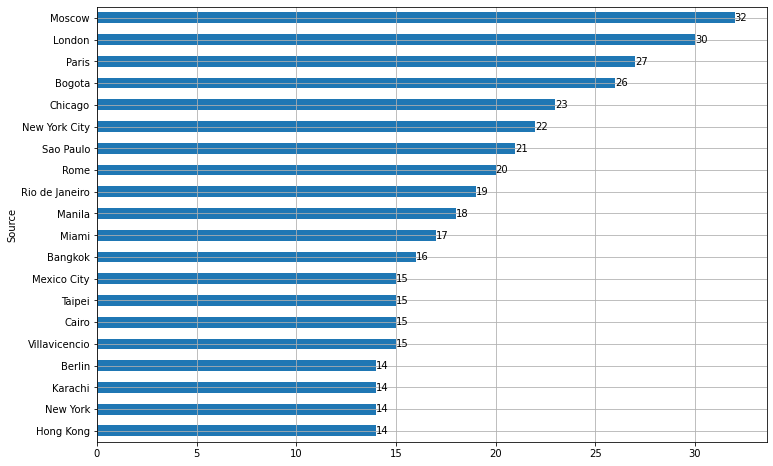

In [126]:
column = 'Source'

ax = df.query(f"{column} != '?' and {column} != ''") \
    .groupby(column) \
    .size() \
    .sort_values(ascending=True) \
    .tail(20) \
    .plot(kind='barh', figsize=(12, 8))
    
for i in ax.containers:
    ax.bar_label(i, )    

plt.grid()
plt.show()

## 2.11 Show crashes by month

In [127]:
df_month = df.groupby('Month') \
            .size() \
            .reset_index(name='Crash_count')

selected_palette = [random.choice(colour_list)]
# df_month['Month'] = pd.Categorical(df_month['Month'], categories=month_order, ordered=True)

# df_month = df_month.sort_values(by='Month')

selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')  

figure = px.histogram(    
    data_frame=df_month,
    x='Month',
    y='Crash_count',
    text_auto=True,
    nbins=12,
    title=f'Number of plane crashes per month',
    color_discrete_sequence=[selected_colour]
).update_layout(bargap=0.05).update_yaxes(title_text='Crashes')
figure.show()

Colour = ivory


## 2.12 Crashes by day of the week

In [128]:
df_day = df.groupby('Day_of_week') \
            .size() \
            .reset_index(name='Crash_count')
            
# Sort the DataFrame by the 'day' column
df_day = df_day.sort_values(by='Day_of_week').reset_index(drop=True)            

selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')  

px.histogram(    
    data_frame=df_day,
    x='Day_of_week',
    y='Crash_count',
    text_auto=True,
    nbins=7,
    title='Number of crashes per day',
    color_discrete_sequence=[selected_colour]
).update_layout(bargap=0.05).update_yaxes(title_text='Crashes')

Colour = lightskyblue


## 2.13 Checking out the number of crashes for two dimensions

### 2.13.1 Grouping by year and month

Now, show a heatmap for crash count for every 20 years.

Firstly, we'll make a month column in the dataframe to keep track of the month name.

Then, we make a function to make a pivot table and then show the graphs.

In [129]:
decade = 1900

decade_values = [decade + 10*i for i in range(0, 2)]
df_temp = df.query("Decade in @decade_values").groupby([
            df['Date'].dt.year,
            'Month',
        ]) \
        .size() \
        .rename_axis(['Year', 'Month']) \
        .reset_index(name='Crashes')

df_heat = df_temp.pivot_table(
    index='Month',
    columns='Year',
    values='Crashes'
)
df_heat

Year,1908,1909,1912,1913,1915,1916,1917,1918,1919
Month,,,,,,,,,
January,0,0,0,0,0,0,0,0,0
February,0,0,0,0,0,0,0,0,0
March,0,0,0,0,1,0,2,0,0
April,0,0,0,0,0,0,0,1,0
May,0,0,0,0,0,0,1,0,1
June,0,0,0,0,0,0,2,0,0
July,0,0,1,0,0,1,0,0,2
August,0,0,0,1,0,0,1,2,1
September,1,1,0,1,1,1,0,0,0


In [130]:
decade_separation = 4

In [131]:
named_colorscales = px.colors.named_colorscales()
named_colorscales

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [132]:
def make_heatmap(decade):
    decade_values = [decade + 10*i for i in range(0, decade_separation)]
    
    df_temp = df.query("Decade in @decade_values").groupby([
                df['Date'].dt.year,
                'Month',
            ]) \
            .size() \
            .rename_axis(['Year', 'Month']) \
            .reset_index(name='Crashes')

    df_heat = df_temp.pivot_table(
        index='Month',
        columns='Year',
        values='Crashes',
        fill_value=0
    )

    selected_colour = generate_random_colour()
    # print(f'Colour = {selected_colour}')  

    fig = px.imshow(
        df_heat, 
        aspect='equal', 
        # text_auto=True,
        color_continuous_scale='Jet',
        title=f'Crashes from {decade_values[0]} till {decade_values[-1]+9}',
    )
    fig.show()

Now let's find the value of decades and plot accordingly

In [133]:
decade_values_GLOBAL = df['Decade'].unique().tolist()[::-decade_separation]
decade_values_GLOBAL

[1900, 1940, 1980, 2020]

In [134]:
for decade in decade_values_GLOBAL:
    make_heatmap(decade)

### 2.13.2 Grouping by month and day of week

In [135]:
df_month_day_of_week = df.groupby(['Month', 'Day_of_week']) \
                .size() \
                .reset_index(name='Crashes')

df_month_day_of_week['Month'] = pd.Categorical(df_month_day_of_week['Month'], categories=month_order, ordered=True)
df_month_day_of_week['Day_of_week'] = pd.Categorical(df_month_day_of_week['Day_of_week'], categories=day_order, ordered=True)

crash_matrix = df_month_day_of_week.pivot_table(
    index='Day_of_week',
    columns='Month',
    values='Crashes'
)

px.imshow(crash_matrix, text_auto=True, title='Crashes by day of week and month', color_continuous_scale='Jet')

### 2.13.3 Grouping by month and day number

In [136]:
df_month_day_number = df.groupby(['Month', df['Date'].dt.day]) \
                .size() \
                .reset_index(name='Crashes') \
                .rename(columns={'Date': 'Day'})

df_month_day_number['Month'] = pd.Categorical(df_month_day_number['Month'], categories=month_order, ordered=True)

crash_matrix = df_month_day_number.pivot_table(
    columns='Day',
    index='Month',
    values='Crashes'
)

px.imshow(
    crash_matrix, 
    aspect='equal',
    # text_auto=True, 
    color_continuous_scale='Rainbow',
    # color_continuous_midpoint=1,
    title='Crashes by day of week and month'
)

## 2.14 Checking out the number of fatalities

### 2.14.1 Per year

In [137]:
fig = px.colors.qualitative.swatches()
fig.show()

In [138]:
df_year = df.groupby(df['Date'].dt.year) \
            ['Total_fatalities'] \
            .agg('sum') \
            .reset_index(name='Fatalities') \
            .rename(columns={'Date': 'Year'})
            
selected_colour = generate_random_colour()
print(f'Colour = {selected_colour}')  
            
fig1 = px.line(
    df_year,
    x='Year',
    y='Fatalities',
    markers=True,
    title='Fatalities per year',
    line_shape='spline',
    color_discrete_sequence=[selected_colour]
)
fig1.show()

Colour = mistyrose


### 2.14.2 Per month

In [139]:
df_month = df.groupby('Month') \
            ['Total_fatalities'] \
            .agg('sum') \
            .reset_index(name='Fatalities') \
            .rename(columns={'Date': 'Month'})
            
df_month['Month'] = pd.Categorical(df_month['Month'], categories=month_order, ordered=True)
df_month = df_month.sort_values(by='Month')      

selected_colour_1, selected_colour_2 = generate_random_colour(), generate_random_colour()

print(f'Colour 1 = {selected_colour_1} and colour 2 = {selected_colour_2}')  

fig1 = px.line(
    df_month,
    x='Month',
    y='Fatalities',
    markers=True,
    title='Fatalities per month',
    line_shape='spline',
    color_discrete_sequence=[selected_colour_1]
)
fig1.show()

fig2 = px.histogram(
    df_month,
    x='Month',
    y='Fatalities',
    nbins=12,
    color_discrete_sequence=[selected_colour_2],
    text_auto=True,
    title='Fatalities per month',
)
fig2.show()

Colour 1 = indigo and colour 2 = silver


### 2.14.3 Per day of month

In [140]:
df_day = df.groupby(df['Date'].dt.day) \
            ['Total_fatalities'] \
            .agg('sum') \
            .reset_index(name='Fatalities') \
            .rename(columns={'Date': 'Day'})
            
selected_colour_1, selected_colour_2 = generate_random_colour(), generate_random_colour()

print(f'Colour 1 = {selected_colour_1} and colour 2 = {selected_colour_2}')  
            
fig1 = px.line(
    df_day,
    x='Day',
    y='Fatalities',
    markers=True,
    title='Fatalities per Day',
    line_shape='spline',
    color_discrete_sequence=[selected_colour_1]
)
fig1.show()

fig2 = px.histogram(
    df_day,
    x='Day',
    y='Fatalities',
    nbins=32,
    color_discrete_sequence=[selected_colour_2],
    text_auto=True,
    title='Fatalities per Day',
).update_layout(bargap=0.15).update_yaxes(title_text='Fatalities')
fig2.show()

Colour 1 = dimgrey and colour 2 = lightslategray


### 2.14.4 Per day of the week

In [141]:
df_day_of_week = df.groupby('Day_of_week') \
            ['Total_fatalities'] \
            .agg('sum') \
            .reset_index(name='Fatalities') \
            .rename(columns={'Date': 'Day_of_week'})

df_day_of_week['Day_of_week'] = pd.Categorical(df_day_of_week['Day_of_week'], categories=day_order, ordered=True)
df_day_of_week = df_day_of_week.sort_values(by='Day_of_week')     

selected_colour = generate_random_colour()

print(f'Colour = {selected_colour}')  

fig2 = px.histogram(
    df_day_of_week,
    x='Day_of_week',
    y='Fatalities',
    nbins=32,
    text_auto=True,
    title='Fatalities per Day',
    color_discrete_sequence=[selected_colour]
).update_layout(bargap=0.15).update_yaxes(title_text='Fatalities').update_xaxes(title_text='Day of the week')
fig2.show()

Colour = dimgray


### 2.14.5 Year and month

In [142]:
def make_heatmap_fatalities(decade):
    decade_values = [decade + 10*i for i in range(0, decade_separation)]
    
    df_year_month = df.query("Decade in @decade_values") \
                    .groupby([df['Date'].dt.year, 'Month']) \
                    ['Total_fatalities'] \
                    .agg('sum') \
                    .reset_index() \
                    .rename(columns={'Date': 'Year'})
    
    # Changing data type since it's causing issues in the pivot table
    df_year_month['Total_fatalities'] = df_year_month['Total_fatalities'].astype('int16')
     
    df_heat = df_year_month.pivot('Month', 'Year', 'Total_fatalities')

    df_heat = df_year_month.pivot_table(
        index='Month',
        columns='Year',
        values='Total_fatalities',
        fill_value=0
    )

    fig = px.imshow(
        df_heat, 
        aspect='equal', 
        color_continuous_scale='Jet',
        title=f'Fatalities from {decade_values[0]} till {decade_values[-1]+9}',
    )
    fig.show()

In [143]:
for decade in decade_values_GLOBAL:
    make_heatmap_fatalities(decade)

### 2.14.6 Month and day of week

In [144]:
df_month_day_of_week = df.groupby(['Month', 'Day_of_week']) \
                ['Total_fatalities'] \
                .agg('sum') \
                .reset_index(name='Fatalities')

df_month_day_of_week['Month'] = pd.Categorical(df_month_day_of_week['Month'], categories=month_order, ordered=True)
df_month_day_of_week['Day_of_week'] = pd.Categorical(df_month_day_of_week['Day_of_week'], categories=day_order, ordered=True)
df_month_day_of_week['Fatalities'] = df_month_day_of_week['Fatalities'].astype('int32')

crash_matrix = df_month_day_of_week.pivot_table(
    index='Day_of_week',
    columns='Month',
    values='Fatalities'
)

px.imshow(crash_matrix, text_auto=True, title='Fatalities by day of week and month', color_continuous_scale='Jet')

### 2.14.7 Month and day number

In [145]:
df_month_day_number = df.groupby(['Month', df['Date'].dt.day]) \
                ['Total_fatalities'] \
                .agg('sum') \
                .reset_index(name='Fatalities') \
                .rename(columns={'Date': 'Day'})

#  Changing data type since it's causing issues in the pivot table
df_month_day_number['Fatalities'] = df_month_day_number['Fatalities'].astype('int16')

crash_matrix = df_month_day_number.pivot_table(
    columns='Day',
    index='Month',
    values='Fatalities'
)

px.imshow(crash_matrix, title='Fatalities by day number and month', color_continuous_scale='Jet')

## 2.15 MAPS!

### 2.15.1 For crashes

In [146]:
crash_counts = df.groupby('Country').size().reset_index(name='Crashes')

fig = px.choropleth(
    crash_counts,
    locations='Country',
    locationmode='country names',
    color='Crashes',
    hover_name='Country',
    color_continuous_scale='Jet'
).update_layout(geo=dict(showocean=True, oceancolor='LightBlue'),
    title=dict(x=0.5),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

### 2.15.2 For fatalities

In [147]:
death_counts = df.groupby('Country')['Total_fatalities'].agg('sum').reset_index(name='Deaths')

fig = px.choropleth(
    death_counts,
    locations='Country',
    locationmode='country names',
    color='Deaths',
    hover_name='Country',
    color_continuous_scale='Jet'
).update_layout(geo=dict(showocean=True, oceancolor='LightBlue'),
    title=dict(x=0.5),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

### 2.15.3 Survival rates

In [148]:
survival_rate = df.groupby('Country')['Survival_rate'].agg('mean').reset_index(name='Survival_rate')

fig = px.choropleth(
    survival_rate,
    locations='Country',
    locationmode='country names',
    color='Survival_rate',
    hover_name='Country',
    color_continuous_scale='Darkmint'
).update_layout(geo=dict(showocean=True, oceancolor='LightBlue'),
    title=dict(x=0.5),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

### 2.15.4 For the US

In [149]:
state_abbr = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
              'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
              'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
              'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
              'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
              'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
              'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
              'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
              'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
              'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [150]:
import json

with open('US_states_abbrv.json', 'w') as file:
    json.dump(state_abbr, file)

#### 2.15.4.1 Crashes

In [151]:
df_US_crash = df.query('Country == "United States of America"') \
                    .groupby('US_State') \
                    .size() \
                    .reset_index(name='Crashes')

df_US_crash['StateAbbr'] = df_US_crash['US_State'].map(state_abbr)

fig = px.choropleth(
    df_US_crash,
    locations='StateAbbr',
    locationmode='USA-states',
    color='Crashes',
    hover_name='US_State',
    color_continuous_scale='Jet',
    scope='usa',
    title='Plane crashes in the US'
)

fig.show()

#### 2.15.4.2 Fatalities

In [152]:
df_US_deaths = df.query('Country == "United States of America"') \
                    .groupby('US_State')['Total_fatalities'] \
                    .agg('sum') \
                    .reset_index(name='Deaths')

df_US_deaths['StateAbbr'] = df_US_deaths['US_State'].map(state_abbr)

fig = px.choropleth(
    df_US_deaths,
    locations='StateAbbr',
    locationmode='USA-states',
    color='Deaths',
    hover_name='US_State',
    color_continuous_scale='Jet',
    scope='usa',
    title='Deaths by plane crashes in the US'
)

fig.show()

#### 2.15.4.3 Survival rates

In [153]:
df_US_survival = df.query('Country == "United States of America"') \
                    .groupby('US_State')['Survival_rate'] \
                    .agg('mean') \
                    .reset_index(name='Survival_rate')

df_US_survival['StateAbbr'] = df_US_survival['US_State'].map(state_abbr)

fig = px.choropleth(
    df_US_survival,
    locations='StateAbbr',
    locationmode='USA-states',
    color='Survival_rate',
    hover_name='US_State',
    color_continuous_scale='Emrld',
    scope='usa',
    title='Survival rate of plane crashes in the US'
)

fig.show()

## 2.16 Survival rates

If you were unlucky enough to be in a plane crash, what are your odds of surviving? This sub-topic aims to explore this.

### 2.16.1 By year

In [154]:
df_year = df.groupby(df['Date'].dt.year) \
            ['Survival_rate'] \
            .agg('mean') \
            .reset_index() \
            .rename(columns={'Date': 'Year'})

selected_colour = generate_random_colour()
print(f'Colour = {selected_colour}')  
color_discrete_sequence=[selected_colour]

fig = px.line(
    df_year,
    x='Year',
    y='Survival_rate',
    color_discrete_sequence=color_discrete_sequence,
    markers=True,
    title='Survival rates by year'
)

fig.show()

Colour = peru


### 2.16.2 By month

In [155]:
df_month = df.groupby('Month') \
            ['Survival_rate'] \
            .agg('mean') \
            .reset_index()

selected_colour = generate_random_colour()
print(f'Colour = {selected_colour}')  
color_discrete_sequence=[selected_colour]

fig2 = px.histogram(
    df_month,
    x='Month',
    y='Survival_rate',
    nbins=12,
    color_discrete_sequence=[selected_colour],
    text_auto='.2f',
    title='Survival rate per month',
).update_yaxes(title_text='Survival rate')
fig2.show()

Colour = blanchedalmond


### 2.16.3 By day number

In [156]:
df_day = df.groupby(df['Date'].dt.day) \
            ['Survival_rate'] \
            .agg('mean') \
            .reset_index() \
            .rename(columns={'Date': 'Day'})

selected_colour = generate_random_colour()
print(f'Colour = {selected_colour}')  
color_discrete_sequence=[selected_colour]

fig2 = px.histogram(
    df_day,
    x='Day',
    y='Survival_rate',
    nbins=31,
    color_discrete_sequence=[selected_colour],
    text_auto='.2f',
    title='Survival rate per day number',
).update_yaxes(title_text='Survival rate').update_layout(bargap=0.1)
fig2.show()

Colour = lime


### 2.16.4 By day of week

In [157]:
df_day_of_week = df.groupby('Day_of_week') \
            ['Survival_rate'] \
            .agg('mean') \
            .reset_index()

selected_colour = generate_random_colour()
print(f'Colour = {selected_colour}')  
color_discrete_sequence=[selected_colour]

fig2 = px.histogram(
    df_day_of_week,
    x='Day_of_week',
    y='Survival_rate',
    color_discrete_sequence=[selected_colour],
    text_auto='.2f',
    title='Survival rate per day of week',
).update_yaxes(title_text='Survival rate').update_layout(bargap=0.1)
fig2.show()

Colour = darkseagreen


### 2.16.5 Grouping by two dimensions

#### 2.16.5.1 For year and month

For this, we have to make another custom function for heatmaps

In [158]:
def make_heatmap_survival(decade):
    decade_values = [decade + 10*i for i in range(0, decade_separation)]
    
    df_temp = df.query("Decade in @decade_values").groupby([
                df['Date'].dt.year,
                'Month',
            ]) \
            ['Survival_rate'] \
            .agg('mean') \
            .rename_axis(['Year', 'Month']) \
            .reset_index(name='Survival rate')

    df_heat = df_temp.pivot_table(
        index='Month',
        columns='Year',
        values='Survival rate'
    )

    selected_colour = generate_random_colour()
    # print(f'Colour = {selected_colour}')  

    fig = px.imshow(
        df_heat, 
        aspect='equal', 
        # text_auto=True,
        # color_continuous_scale='Darkmint',
        color_continuous_scale='Emrld',
        title=f'Survival rate from {decade_values[0]} till {decade_values[-1]+9}',
    )
    fig.show()

In [159]:
for decade in decade_values_GLOBAL:
    make_heatmap_survival(decade)

#### 2.16.5.2 For month and day of week

In [160]:
df_month_day_of_week = df.groupby(['Month', 'Day_of_week']) \
                ['Survival_rate'] \
                .agg('mean') \
                .reset_index(name='Survival_rate')

crash_matrix = df_month_day_of_week.pivot_table(
    index='Day_of_week',
    columns='Month',
    values='Survival_rate'
)

px.imshow(crash_matrix, text_auto='.2f', title='Survival rate by day of week and month', color_continuous_scale='Emrld')

#### 2.16.5.3 For month and day number

In [161]:
df_month_day_number = df.groupby(['Month', df['Date'].dt.day]) \
                ['Survival_rate'] \
                .agg('mean') \
                .reset_index(name='Survival_rate') \
                .rename(columns={'Date': 'Day'})

#  Changing data type since it's causing issues in the pivot table
# df_month_day_number['Fatalities'] = df_month_day_number['Fatalities'].astype('int16')

crash_matrix = df_month_day_number.pivot_table(
    columns='Day',
    index='Month',
    values='Survival_rate'
)

px.imshow(crash_matrix, title='Survival rate by day number and month', color_continuous_scale='Emrld')

## 2.17 Violin plots for top 10 countries by fatalities

Let's first get the name of top 5 countries by fatalities

In [162]:
top_5_sources = df.groupby('Source')['Total_fatalities'] \
    .agg('sum') \
    .reset_index() \
    .sort_values(by='Total_fatalities', ascending=False) \
    .iloc[1:6, 0].values
top_5_sources

array(['Moscow', 'New York City', 'London', 'Paris', 'Jeddah'],
      dtype=object)

Then find values in the dataset where the countries are in the top 10 list

In [163]:
df_top_5 = df.query("Source in @top_5_sources")

In [164]:
px.violin(
    df_top_5,
    y='Source',
    x='Total_fatalities',
    box=True
)

## 2.18 Treemaps

### 2.18.1 For crash counts

At least 5 crashes

In [165]:
import numpy as np

px.Constant?

Init signature: px.Constant(value, label=None)
Docstring:     
Objects of this class can be passed to Plotly Express functions that expect column
identifiers or list-like objects to indicate that this attribute should take on a
constant value. An optional label can be provided.
File:           c:\users\user\appdata\local\programs\python\python310\lib\site-packages\plotly\express\_special_inputs.py
Type:           type
Subclasses:     


In [166]:
crash_counts = df.groupby('Country').size().reset_index(name='Crashes').query('Crashes >= 5')

px.treemap(
    crash_counts, 
    path=['Country'], 
    values='Crashes',
    title='Crashes by country'
)

Both continent and country

In [167]:
crash_counts = df.groupby(['Continent', 'Country']).size().reset_index(name='Crashes').query('Crashes >= 5')

fig = px.treemap(
    crash_counts, 
    path=[px.Constant("world"), 'Continent','Country'], 
    values='Crashes',
    color='Crashes',
    title='Crashes by continent and country',
    color_continuous_scale='RdBu',
)
fig.show()

### 2.18.2 For fatalities

At least 100 deaths

In [168]:
death_counts = df.groupby('Country')['Total_fatalities'] \
                    .agg('sum') \
                    .reset_index() \
                    .query('Total_fatalities >= 100')
px.treemap(
    death_counts, 
    path=['Country'],
    values='Total_fatalities',
    title='Fatalities by country',
)

In [169]:
death_counts = df.groupby(['Continent', 'Country'])['Total_fatalities'] \
                    .agg('sum') \
                    .reset_index() \
                    .query('Total_fatalities >= 100 and Continent.notna()')

px.treemap(
    death_counts, 
    path=['Continent', 'Country'],
    values='Total_fatalities',
    color='Country',
    # color_continuous_scale=px.colors.qualitative.Dark2,
    color_discrete_sequence=px.colors.qualitative.Dark24,
    title='Fatalities by continent and country',
    width=1024,
    height=768
)

In [170]:
df.to_csv('Processed_dataset/Crash_data_new.csv', index=False)
df.to_parquet('Processed_dataset/Crash_data_new.parquet')

In [171]:
df_new = pd.read_parquet('Processed_dataset/Crash_data_new.parquet')
df_new.dtypes

Date                     datetime64[ns]
Time                             object
Operator                         object
Flight_No                        object
AC_Type                          object
Registration                     object
cn_ln                            object
Ground                            Int16
Decade                            int64
City                             object
Country                          object
US_State                       category
Total_abroad                      Int16
Passengers_abroad                 Int16
Crew_abroad                       Int16
Total_fatalities                  Int16
Passengers_fatalities             Int16
Crew_fatalities                   Int16
Source                           object
Destination                      object
Total_survivors                   Int16
Passengers_survivors              Int16
Crew_survivors                    Int16
Survival_rate                   Float64
Type                             object


## 2.19 Survivor + Death comparison

In [172]:
px.histogram(
    
)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'